# Bayes Classifier with Univariate and Multivariate Normal Distribution

**Author:** Sima Adleyba  
**Date:** December 2025

**Email**: adleyba@sabanciuniv.edu
<br><br>

**Some additional resources:**


- [Gaussian Discriminant Analysis — Maxwell Libbrecht (YouTube)](https://www.youtube.com/watch?v=-YSsqyIOrgU)  

- [Cornell Tech Applied ML — Gaussian Discriminant Analysis (Website)](https://kuleshov-group.github.io/aml-book/contents/lecture7-gaussian-discriminant-analysis.html)  

- [Multivariate Gaussians & Gaussian Bayes — University of Toronto (PDF)](https://www.cs.toronto.edu/~rgrosse/courses/csc311_f21/lectures/lec08.pdf)  







---



## 1. Math Review

### Exptectation
A discrete random variable X takes on values $x_1$..$x_m$ with
probabilities $p(\mathbf{x_1})$...$p(\mathbf{x_m})$.

Then, expected value of X:<br><br>
$$E[X] = \sum_{i} x_i P(x_i)$$


The average value of a function $f(x)$ under a probability
distribution $p(x)$ is called the expectation of $f(x)$.<br><br>

**Discrete:** If $x$ is a discrete random variable, the expectation is a summation:<br><br>
$$E[f(x)] = \sum_{x} f(x) p(x)$$<br>

**Continuous:** If $x$ is a continuous random variable, the expectation is an integral:<br><br>
$$E[f(x)] = \int f(x) p(x) dx$$



---



### Variance
The variance of a function $f(x)$ provides a measure of how much $f(x)$ varies around its mean $E[f(x)]$.<br><br>
$$
\text{var}[f] = E\left[ (f(x) - E[f(x)])^2 \right] = E[f(x)^2] - (E[f(x)])^2
$$



---



### Covariance

Covariance of two random variables $x$ and $y$ measures the extent to which they vary together.<br><br>
$$
\text{cov}[x, y] = E_{x,y}\left[ \{x - E[x]\} \{y - E[y]\} \right] = E_{x,y}[xy] - E[x]E[y]
$$



---



### Normal (Gaussian) Distribution
1D Normal distribution is defined by its mean $\mu$ and variance $\sigma^2$, denoted as $N(x|\mu, \sigma^2)$ -- it gives the probability density at any point $x$ under Normal distribution with the given two parameters.<br><br>

$$
N(x|\mu, \sigma^2) = \frac{1}{(2\pi\sigma^2)^{1/2}} \exp \left\{ -\frac{1}{2\sigma^2}(x - \mu)^2 \right\}
$$



---



### Gaussian Bayes Classifier

Instead of assuming **conditional independence** of the individual features $x_j$ (as in Naive Bayes), we model the conditional probability $p(\mathbf{x}|t)$ as a **Gaussian (Normal) distribution**. The **dependence relation** of $x_j$ is then captured and encoded in the **covariance matrix** ($\mathbf{\Sigma}$).



---



### Characterizing the Normal Distribution $p(\mathbf{x})$
We need specific parameters to characterize $p(\mathbf{x})$, assuming the feature vector $\mathbf{x}$ is normally distributed. The required parameters depend on the dimensionality ($d$) of the feature space:<br><br>

#### 1. Univariate Case ($d=1$)

For a **1-dimensional** random variable $x$, the distribution is defined by two scalar parameters: the **mean** ($\mu$) and the **variance** ($\sigma^2$).<br><br>

**Mean:**<br><br>
$$\mu = E[x]$$<br><br>

**Variance:**<br><br>
$$\sigma^2 = E[(x - \mu)^2]$$<br><br>

**Probability Density Function (PDF)**:<br><br>
$$N(x|\mu, \sigma^2) = \frac{1}{(2\pi\sigma^2)^{1/2}} \exp \left\{ -\frac{1}{2\sigma^2}(x - \mu)^2 \right\}$$<br><br>

#### 2. Multivariate Case ($d$-dimensions)

For a **$d$-dimensional** feature vector $\mathbf{x}$, we require two structured parameters:<br><br>

The **$d$-dimensional mean vector**($\boldsymbol{\mu}$): <br><br>
$$\boldsymbol{\mu} = E[\mathbf{x}]$$<br><br>

The **$d \times d$ dimensional covariance matrix** ($\mathbf{\Sigma}$): This matrix encodes all pairwise dependencies.<br><br>
$$\mathbf{\Sigma} = E[(\mathbf{x} - \boldsymbol{\mu})(\mathbf{x} - \boldsymbol{\mu})^T]$$<br>

The resulting distribution is the **Multivariate Gaussian Distribution** <br>

Its PDF is given by:<br><br>

$$N(\mathbf{x}|\boldsymbol{\mu}, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{D/2} |\mathbf{\Sigma}|^{1/2}} \exp \left\{ -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right\}$$



---



### MLE Estimates of Gaussians


##### MLE Estimates of Parameters for a Multivariate Gaussian ($\mathbf{x}$ is a vector):<br><br>

**Estimated Mean Vector:**<br><br>
$$\hat{\boldsymbol{\mu}} = \frac{1}{m} \sum_{i=1}^{m} \mathbf{x}^{(i)}$$<br>

**Estimated Covariance Matrix:**<br><br>
$$\hat{\mathbf{\Sigma}} = \frac{1}{m} \sum_{i=1}^{m} (\mathbf{x}^{(i)} - \hat{\boldsymbol{\mu}})(\mathbf{x}^{(i)} - \hat{\boldsymbol{\mu}})^T$$<br><br>

**Component-wise Estimated Covariance** (off-diagonal element $\text{cov}(x_k, x_n)$):<br>
The $(k, n)$-th component of $\hat{\mathbf{\Sigma}}$ is:<br><br>
$$\frac{1}{m}\sum_{i=1}^{m} (x_k^{(i)} - \bar{x}_k)(x_n^{(i)} - \bar{x}_n)$$<br><br>

##### PDF of Multivariate Gaussian Distribution<br>
$N(\mathbf{x}|\boldsymbol{\mu}, \mathbf{\Sigma})$:<br><br>
$$
N(\mathbf{x}|\boldsymbol{\mu}, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{D/2} |\mathbf{\Sigma}|^{1/2}} \exp \left\{ -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right\}
$$<br><br>



---



### MLE for Prior Probability $\pi_k$

This is the MLE for the prior probability of class $k$ in a classification context:<br><br>
$$\pi_k = \frac{\sum_{i=1}^{N} {P} (t^{(i)} = k)}{N}$$



---



### Bayes Theorem

Given two events:<br>
$A$ (the hypothesis/class)<br>
$B$ (the evidence/data)<br><br>
Bayes' Theorem is expressed as:<br><br>
$$\mathbf{P}(A \mid B) = \frac{\mathbf{P}(B \mid A) \mathbf{P}(A)}{\mathbf{P}(B)}$$



---



## 2. Univariate (1D) Gaussian Bayes Classifier (Temperature → Healthy vs Sick)

In this example we classify whether a child is **healthy** or **sick** based on a **single feature**: body temperature.

We assume that temperature follows a **1D Gaussian distribution** for each class:

* **Healthy:** lower average temperature, large variance
* **Sick:** higher average temperature, small variance

This means each class has:

* a mean (typical temperature)
* a variance (how much it fluctuates)

Given a new observed temperature (x):


1. We compute the **prior probabilities**
   (how common each class is in the training data):<br>
   $[
   P(\text{Healthy}), \quad P(\text{Sick})
   ]$

2. We compute the **likelihoods** for the observed temperature (x):<br>
   $[
   P(x \mid \text{Healthy}), \quad P(x \mid \text{Sick})
   ]$

3. We multiply each prior with its corresponding likelihood to obtain **unnormalized posterior scores**:<br>
   $[
   P(\text{Healthy}) \times P(x \mid \text{Healthy}), \quad
   P(\text{Sick}) \times P(x \mid \text{Sick})
   ]$

4. We compare the two scores and assign the class with the **larger value**.

<br>

This gives us a simple **Bayesian classifier** that uses the shape of the temperature distributions and the prior frequency of each class to decide whether a child is more likely to be healthy or sick.


### Generate Synthetic 1D Data

Import necessary libraries

In [33]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from numpy.linalg import inv, det
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

np.random.seed(42)

Generate data

In [34]:
def gaussian_pdf_1d(x, mu, sigma2):
    coef = 1.0 / np.sqrt(2 * np.pi * sigma2)
    return coef * np.exp(-0.5 * (x - mu) ** 2 / sigma2)

In [35]:
true_mu_healthy = 36.9
true_sigma_healthy = 0.6
true_sigma2_healthy = true_sigma_healthy**2

true_mu_sick = 38
true_sigma_sick = 0.2
true_sigma2_sick = true_sigma_sick**2

true_prior_sick = 0.40
true_prior_healthy = 0.60

n_samples = 1000

In [36]:
# generate labels
y = np.random.choice([0,1], size=n_samples, p=[true_prior_healthy, true_prior_sick])

temps = np.zeros(n_samples)
for i, label in enumerate(y):
    if label == 0:
        temps[i] = np.random.normal(true_mu_healthy, true_sigma_healthy)
    else:
        temps[i] = np.random.normal(true_mu_sick, true_sigma_sick)

Check population statistics

In [37]:
print("--- DATASET SUMMARY ---")
print(f"Total samples: {len(temps)}")
print(f"Healthy count: {(y==0).sum()}   ({(y==0).mean():.3f})")
print(f"Sick count:     {(y==1).sum()}   ({(y==1).mean():.3f})")

print("\n--- OVERALL TEMPERATURE STATS (ALL DATA) ---")
print(f"Min:  {temps.min():.3f}")
print(f"Max:  {temps.max():.3f}")
print(f"Mean: {temps.mean():.3f}")
print(f"Std:  {temps.std(ddof=1):.3f}")

print("\n--- CLASS-SPECIFIC STATS ---")
temps_H = temps[y==0]
temps_S = temps[y==1]

print("Healthy class:")
print(f"  Mean: {temps_H.mean():.3f}")
print(f"  Std:  {temps_H.std(ddof=1):.3f}")

print("\nSick class:")
print(f"  Mean: {temps_S.mean():.3f}")
print(f"  Std:  {temps_S.std(ddof=1):.3f}")


--- DATASET SUMMARY ---
Total samples: 1000
Healthy count: 613   (0.613)
Sick count:     387   (0.387)

--- OVERALL TEMPERATURE STATS (ALL DATA) ---
Min:  35.191
Max:  38.816
Mean: 37.382
Std:  0.684

--- CLASS-SPECIFIC STATS ---
Healthy class:
  Mean: 36.989
  Std:  0.583

Sick class:
  Mean: 38.004
  Std:  0.203


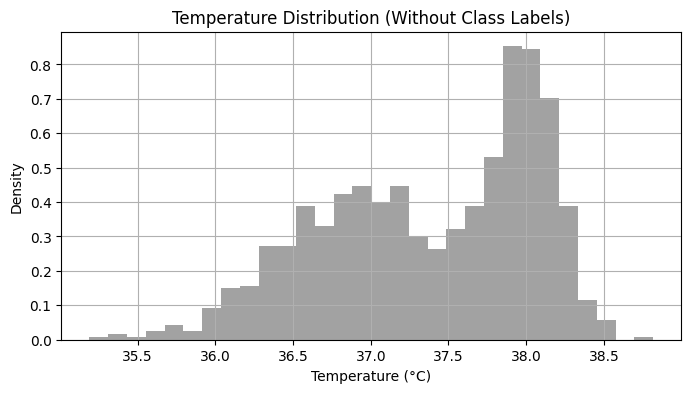

In [38]:
# histogram of the distribution without class labels
plt.figure(figsize=(8,4))
plt.hist(temps, bins=30, density=True, alpha=0.7, color="#7B7B7B")

plt.xlabel("Temperature (°C)")
plt.ylabel("Density")
plt.title("Temperature Distribution (Without Class Labels)")
plt.grid(True)
plt.show()


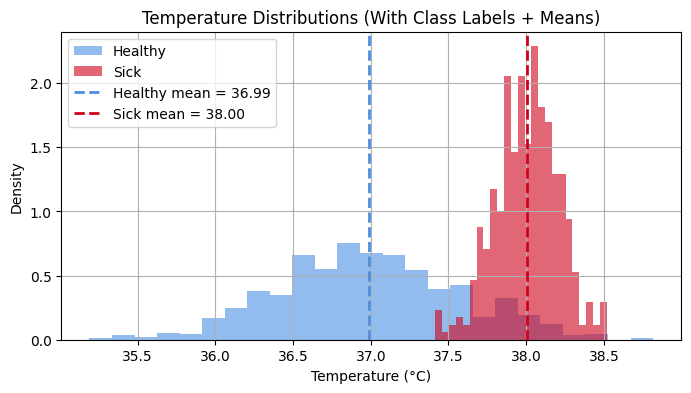

In [39]:
# histogram of the distributions with class labels
plt.figure(figsize=(8,4))
plt.hist(temps[y==0], bins=25, alpha=0.6, density=True, label="Healthy", color="#4A90E2")
plt.hist(temps[y==1], bins=25, alpha=0.6, density=True, label="Sick", color="#D0021B")

# compute class means
mu_H = temps[y==0].mean()
mu_S = temps[y==1].mean()

# add vertical lines for means
plt.axvline(mu_H, color="#4A90E2", linestyle="--", linewidth=2, label=f"Healthy mean = {mu_H:.2f}")
plt.axvline(mu_S, color="#D0021B", linestyle="--", linewidth=2, label=f"Sick mean = {mu_S:.2f}")

plt.xlabel("Temperature (°C)")
plt.ylabel("Density")
plt.title("Temperature Distributions (With Class Labels + Means)")
plt.legend()
plt.grid(True)
plt.show()


### Train - Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    temps,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# ---------- TRAIN SET ----------
healthy_train = (y_train == 0).sum()
sick_train    = (y_train == 1).sum()
total_train   = len(y_train)

print("Train size:", total_train)
print(f"  Healthy: {healthy_train} ({healthy_train/total_train:.3f})")
print(f"  Sick:    {sick_train} ({sick_train/total_train:.3f})")

# ---------- TEST SET ----------
healthy_test = (y_test == 0).sum()
sick_test    = (y_test == 1).sum()
total_test   = len(y_test)

print("\nTest size:", total_test)
print(f"  Healthy: {healthy_test} ({healthy_test/total_test:.3f})")
print(f"  Sick:    {sick_test} ({sick_test/total_test:.3f})")


Train size: 700
  Healthy: 429 (0.613)
  Sick:    271 (0.387)

Test size: 300
  Healthy: 184 (0.613)
  Sick:    116 (0.387)


### Classification

#### Process

For each class (C_i):

* Compute the prior probability
  $$P(C_i)$$

* Compute the likelihood for the observed feature value under each class
  $$P(\text{data} \mid C_i)$$

* Multiply prior × likelihood
  $$P(C_i) \times P(\text{data} \mid C_i)$$
  to obtain unnormalized posterior scores.

<br>Compare the two scores and choose the class with the larger value.



---



Calculate mean and variance for each class

**Mean:**

$$
\mu = E[x]
$$

**Variance:**

$$
\sigma^2 = E[(x - \mu)^2]
$$


In [41]:
# separate classes in training data
X_H = X_train[y_train == 0]   # Healthy
X_S = X_train[y_train == 1]   # Sick

# MLE estimates: mean and variance for each class
mu_H_hat = X_H.mean()
sigma2_H_hat = X_H.var(ddof=1)

mu_S_hat = X_S.mean()
sigma2_S_hat = X_S.var(ddof=1)

Class Prior (Probability of Each Class)

The prior for a class $C_i$ is simply the fraction of training samples that belong to that class:

$$
P(C_i) = \frac{\#\{y^{(j)} = C_i\}}{N}
$$

Where:

* $N$ is the number of training samples
* the numerator counts how many samples have label $C_i$

In [42]:
# class priors (also from training data)
prior_H_hat = (y_train == 0).mean()
prior_S_hat = (y_train == 1).mean()

Print the estimates

In [43]:
print("--- MLE estimates from training data ---")
print(f"\nHealthy: mu_H_hat={mu_H_hat:.3f}, sigma2_H_hat={sigma2_H_hat:.4f}")
print(f"Sick:    mu_S_hat={mu_S_hat:.3f}, sigma2_S_hat={sigma2_S_hat:.4f}")
print(f"\nP(Healthy)≈{prior_H_hat:.3f}, P(Sick)≈{prior_S_hat:.3f}")

--- MLE estimates from training data ---

Healthy: mu_H_hat=37.003, sigma2_H_hat=0.3242
Sick:    mu_S_hat=38.009, sigma2_S_hat=0.0429

P(Healthy)≈0.613, P(Sick)≈0.387


#### Univariate (1D) Gaussian PDF Function

$$
N(x|\mu, \sigma^2) = \frac{1}{(2\pi\sigma^2)^{1/2}} \exp \left\{ -\frac{1}{2\sigma^2}(x - \mu)^2 \right\}
$$

In [44]:
def gaussian_pdf_1d(x, mu, sigma2):

    """
    Univariate Gaussian pdf N(mu, sigma2).
    X: scalar or numpy array.
    """

    x = np.asarray(x, dtype=float)
    coef = 1.0 / np.sqrt(2 * np.pi * sigma2)
    return coef * np.exp(-0.5 * (x - mu) ** 2 / sigma2)

#### Univariate (1D) Gaussian Classification Function

In [45]:
def classify_1D_gaussian(X):

    """
    Classify 1D observations using a two-class Gaussian Bayes classifier.
    X: scalar or 1D array
    Returns: array of predictions (0 = Healthy, 1 = Sick)
    """

    X = np.asarray(X, dtype=float)

    # likelihoods
    p_x_given_H = gaussian_pdf_1d(X, mu_H_hat, sigma2_H_hat)
    p_x_given_S = gaussian_pdf_1d(X, mu_S_hat, sigma2_S_hat)

    # unnormalized posteriors
    score_H = p_x_given_H * prior_H_hat
    score_S = p_x_given_S * prior_S_hat

    # choose class with larger score
    preds = (score_S > score_H).astype(int)
    return preds


#### Evaluation

In [46]:
# evaluate on both train and test sets
y_pred_train = classify_1D_gaussian(X_train)
y_pred_test = classify_1D_gaussian(X_test)

train_accuracy = (y_pred_train == y_train).mean()
test_accuracy = (y_pred_test == y_test).mean()

print(f"\n1D Gaussian Bayes Classifier Performance:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")


1D Gaussian Bayes Classifier Performance:
Training Accuracy: 0.899
Test Accuracy: 0.907


#### Visualization of the Decision Boundary

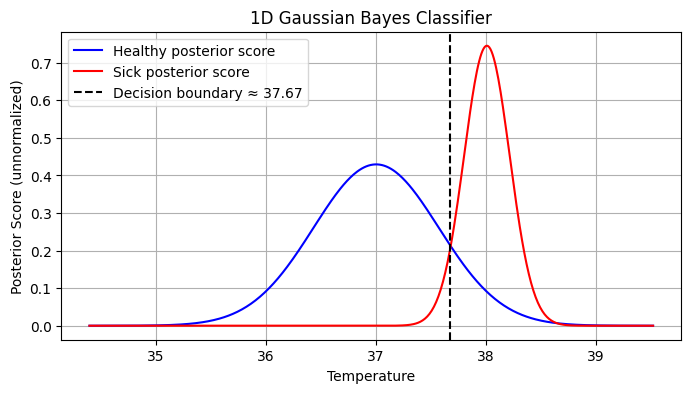

In [47]:
# plot posterior scores and TRUE decision boundary
xs = np.linspace(X_train.min() - 1, X_train.max() + 1, 500)

posterior_H = gaussian_pdf_1d(xs, mu_H_hat, sigma2_H_hat) * prior_H_hat
posterior_S = gaussian_pdf_1d(xs, mu_S_hat, sigma2_S_hat) * prior_S_hat

# find where posterior_S > posterior_H (i.e., where classifier switches)
# the boundary is where they're equal: posterior_S == posterior_H
decision_boundaries = xs[np.where(np.diff(posterior_S > posterior_H))[0]]

plt.figure(figsize=(8,4))
plt.plot(xs, posterior_H, label="Healthy posterior score", color="blue")
plt.plot(xs, posterior_S, label="Sick posterior score", color="red")

# plot the actual decision boundary
if len(decision_boundaries) > 0:
    boundary = decision_boundaries[0]
    plt.axvline(boundary, color="black", linestyle="--",
                label=f"Decision boundary ≈ {boundary:.2f}")

plt.title("1D Gaussian Bayes Classifier")
plt.xlabel("Temperature")
plt.ylabel("Posterior Score (unnormalized)")
plt.legend()
plt.grid(True)
plt.show()



---



## 3. Multivariate (d-Dimensions) Gaussian Bayes Classifier

We will create a simple 2D dataset that mimics an NLP-related classification problem:
**distinguishing human accounts from bot accounts** on a social platform.

Each account is represented using two numerical features:

1. **Tweet Frequency**

   * how many tweets the account posts per day
   * bots tend to tweet much more often than humans

2. **Hashtag Count**

   * average number of hashtags used per tweet
   * bots often use more hashtags to maximize reach

We assume that these features for each class (Human vs Bot) follow a **2D multivariate Gaussian distribution**.
This means each class forms an elliptical cloud in the 2D feature space, defined by:

* a **mean vector** (average tweet frequency, average hashtag usage)
* a **covariance matrix** (how the features vary together)

Humans typically have:

* lower activity
* lower hashtag usage
* more variability

Bots often have:

* higher activity
* higher hashtag usage
* lower variability

By generating samples from these two Gaussians, we obtain a synthetic dataset where:

* class 0 = Human
* class 1 = Bot

We can then visualize the two clusters and later apply a **Bayesian classifier** to decide whether a new account is more likely to be a human or a bot given its feature values.


/tmp/ipython-input-985919254.py:14: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  human_data = np.random.multivariate_normal(mu_human, Sigma_human, n_samples)


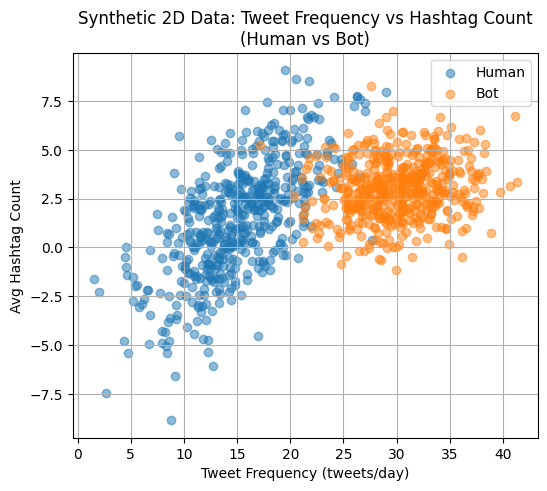

In [48]:
# means: (tweet frequency, avg hashtag count)
mu_human = np.array([15, 1.5])   # humans
mu_bot   = np.array([30, 3])   # bots

# covariance matrices - human has strong correlation, bot is more circular
Sigma_human = np.array([[20,  12],   # increased correlation
                        [12,  1.5]]) # stronger correlation

Sigma_bot = np.array([[15,  1],      # weak correlation
                      [ 1,  2]])   # nearly circular

n_samples = 500

human_data = np.random.multivariate_normal(mu_human, Sigma_human, n_samples)
bot_data   = np.random.multivariate_normal(mu_bot,   Sigma_bot,   n_samples)

# combine
X = np.vstack((human_data, bot_data))
y = np.concatenate((np.zeros(n_samples), np.ones(n_samples)))

plt.figure(figsize=(6,5))
plt.scatter(human_data[:,0], human_data[:,1], label="Human", alpha=0.5)
plt.scatter(bot_data[:,0],   bot_data[:,1],   label="Bot",   alpha=0.5)
plt.xlabel("Tweet Frequency (tweets/day)")
plt.ylabel("Avg Hashtag Count")
plt.title("Synthetic 2D Data: Tweet Frequency vs Hashtag Count\n(Human vs Bot)")
plt.legend()
plt.grid(True)
plt.show()

We can observe the positive correlation (tweet frequency and avg. hashtag count tend to increase together)

We can also see that Bots cluster around (30, 3) while Humans cluster around (15, 1.5)

In [49]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print(f"Human sample count: {len(human_data)}")
print(f"Bot sample count: {len(bot_data)}")

Shape of X: (1000, 2)
Shape of y: (1000,)
Human sample count: 500
Bot sample count: 500


### Train-Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print("Train size:", len(X_train))
print("  Class 0:", (y_train == 0).sum())
print("  Class 1:", (y_train == 1).sum())

print("\nTest size:", len(X_test))
print("  Class 0:", (y_test == 0).sum())
print("  Class 1:", (y_test == 1).sum())

Train size: 700
  Class 0: 350
  Class 1: 350

Test size: 300
  Class 0: 150
  Class 1: 150


### Classification

#### Process

For each class $C_i$:

- Compute the prior probability  
  $$P(C_i)$$

- Compute the multivariate Gaussian likelihood for the observed 2D feature vector  
  $$P(\mathbf{x} \mid C_i)$$

- Multiply prior × likelihood  
  $$P(C_i) \times P(\mathbf{x} \mid C_i)$$  
  to obtain unnormalized posterior scores.


Compare the two scores and choose the class with the larger value.



---



Estimated Mean Vector:<br>
Given 𝑚 samples from class 𝑘:<br>
<br><br>
$$\hat{\boldsymbol{\mu}} = \frac{1}{m} \sum_{i=1}^{m} \mathbf{x}^{(i)}$$<br>

This is simply the average feature vector of all training points belonging to that class.

In [51]:
# separate training data by class
X_train_0 = X_train[y_train == 0]   # Class 0
X_train_1 = X_train[y_train == 1]   # Class 1

# MLE mean vectors
mu_0_hat = X_train_0.mean(axis=0)
mu_1_hat = X_train_1.mean(axis=0)

Estimated Covariance Matrix:<br>
The covariance describes how the features vary together.<br>
MLE for the covariance:
<br><br>
$$\hat{\mathbf{\Sigma}} = \frac{1}{m} \sum_{i=1}^{m} (\mathbf{x}^{(i)} - \hat{\boldsymbol{\mu}})(\mathbf{x}^{(i)} - \hat{\boldsymbol{\mu}})^T$$<br><br>

Component-wise Estimated Covariance (off-diagonal element $\text{cov}(x_k, x_n)$):<br>
The $(k, n)$-th component of $\hat{\mathbf{\Sigma}}$ is:<br><br>
$$\frac{1}{m}\sum_{i=1}^{m} (x_k^{(i)} - \bar{x}_k)(x_n^{(i)} - \bar{x}_n)$$<br><br>

In [52]:
# MLE covariance matrices (sample cov, unbiased)
Sigma_0_hat = np.cov(X_train_0.T, bias=False)
Sigma_1_hat = np.cov(X_train_1.T, bias=False)

MLE for Prior Probability $\pi_k$

The prior tells us how frequent each class is in the dataset:<br><br>
$$\pi_k = \frac{\sum_{i=1}^{N} {P} (t^{(i)} = k)}{N}$$<br><br>
This is simply:

*   proportion of class 0 points
*   proportion of class 1 points



computed using training labels only.

In [53]:
# priors (from training data only)
prior_0 = (y_train == 0).mean()
prior_1 = (y_train == 1).mean()

Print the estimates

In [54]:
print("--- Parameter Estimates (MLE) ---")
print("\nClass 0 mean:\n", mu_0_hat)
print("Class 0 covariance:\n", Sigma_0_hat)
print("\nClass 1 mean:\n", mu_1_hat)
print("Class 1 covariance:\n", Sigma_1_hat)
print("\nP(Class 0) =", prior_0)
print("P(Class 1) =", prior_1)

--- Parameter Estimates (MLE) ---

Class 0 mean:
 [14.9476315   1.47574608]
Class 0 covariance:
 [[22.11794961  9.30977674]
 [ 9.30977674  8.61504679]]

Class 1 mean:
 [30.11229449  2.98164905]
Class 1 covariance:
 [[16.00068907  0.65731297]
 [ 0.65731297  2.19900092]]

P(Class 0) = 0.5
P(Class 1) = 0.5


#### Visualization of the Covariance

In [55]:
def plot_cov_ellipse(mean, cov, ax=None, color='red', alpha=0.2, n_std=2.0):
    """
    Plot an n-std confidence ellipse of a 2D Gaussian distribution.
    """
    if ax is None:
        ax = plt.gca()

    # eigenvalues and eigenvectors
    vals, vecs = la.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    # ellipse orientation
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))

    # width and height = 2 * std along principal axes
    width, height = 2 * n_std * np.sqrt(vals)

    ellip = mpatches.Ellipse(
        xy=mean, width=width, height=height,
        angle=theta, color=color, alpha=alpha
    )
    ax.add_patch(ellip)


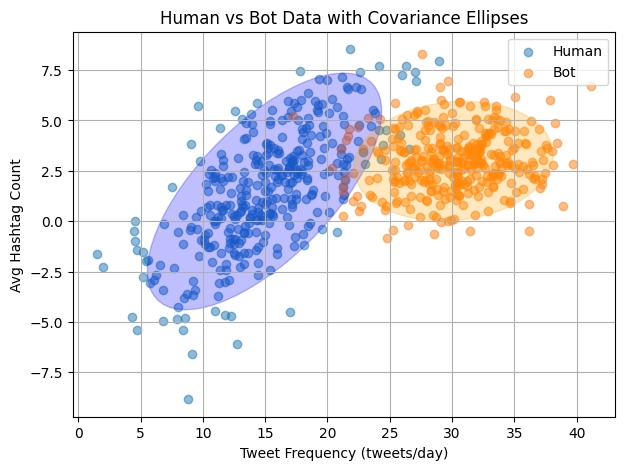

In [56]:
plt.figure(figsize=(7,5))

plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1],
            alpha=0.5, label="Human")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1],
            alpha=0.5, label="Bot")

# draw 2-std ellipses
plot_cov_ellipse(mu_0_hat, Sigma_0_hat, color='blue',  alpha=0.25, n_std=2)
plot_cov_ellipse(mu_1_hat, Sigma_1_hat, color='orange', alpha=0.25, n_std=2)

plt.xlabel("Tweet Frequency (tweets/day)")
plt.ylabel("Avg Hashtag Count")
plt.title("Human vs Bot Data with Covariance Ellipses")
plt.legend()
plt.grid(True)
plt.show()


#### Multivariate Gaussian Distribution PDF

A multivariate Gaussian models how likely a feature vector $\mathbf{x}$ is under a class.
It is defined by:

* a **mean vector** $\boldsymbol{\mu}$ (center of the class)
* a **covariance matrix** $\Sigma$ (shape, orientation, and spread of the class)

The term<br><br>

$$
(\mathbf{x} - \boldsymbol{\mu})^{T} \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu})
$$<br><br>

is the **Mahalanobis distance**, which measures how far $\mathbf{x}$ is from the class mean, while taking into account:

* the variance of each feature, and
* the correlation between features.

Points close to the mean with respect to this distance have high likelihood;
points far away have low likelihood.

The full multivariate Gaussian PDF is:<br><br>

$$
N(\mathbf{x}|\boldsymbol{\mu}, \Sigma)
=
\frac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}}
\exp\left(
-\frac{1}{2}
(\mathbf{x} - \boldsymbol{\mu})^{T}
\Sigma^{-1}
(\mathbf{x} - \boldsymbol{\mu})
\right)
$$

In [57]:
def mahalanobis_distance(x, mu, Sigma):

    """
    Computes the Mahalanobis distance:
        (x - mu)^T Σ^{-1} (x - mu)
    """

    x = np.asarray(x)
    mu = np.asarray(mu)
    diff = x - mu
    inv_Sigma = np.linalg.inv(Sigma)
    return float(diff.T @ inv_Sigma @ diff)


def multivariate_gaussian_pdf(x, mu, Sigma):
    """
    Multivariate Gaussian density N(x | mu, Sigma).
    Uses Mahalanobis distance.
    """
    D = len(mu)
    det_Sigma = np.linalg.det(Sigma)

    # normalization factor
    norm_const = 1.0 / np.sqrt((2 * np.pi)**D * det_Sigma)

    # exponent uses Mahalanobis distance
    mdist = mahalanobis_distance(x, mu, Sigma)
    exponent = -0.5 * mdist

    return float(norm_const * np.exp(exponent))

#### Multivariate (2D) Gaussian Classification Function

In [58]:
def classify_2D_gaussian(X):
    """
    Classify 2D observations using a two-class Gaussian Bayes classifier.
    X: array of shape (N, 2) or a single vector of shape (2,)
    Returns: array of predictions (0 = Human, 1 = Bot)
    """

    X = np.asarray(X)

    # handle a single 2D point
    if X.ndim == 1:
        X = X.reshape(1, -1)

    preds = []

    for x in X:

        # likelihoods using PDF
        p_x_given_0 = multivariate_gaussian_pdf(x, mu_0_hat, Sigma_0_hat)
        p_x_given_1 = multivariate_gaussian_pdf(x, mu_1_hat, Sigma_1_hat)

        # unnormalized posteriors
        score_0 = p_x_given_0 * prior_0
        score_1 = p_x_given_1 * prior_1

        # prediction: class with larger posterior
        preds.append(0 if score_0 > score_1 else 1)

    return np.array(preds)


#### Evaluation

In [59]:
# evaluate classifier performance
y_pred_train = classify_2D_gaussian(X_train)
y_pred_test = classify_2D_gaussian(X_test)

train_accuracy = (y_pred_train == y_train).mean()
test_accuracy = (y_pred_test == y_test).mean()

print(f"\n2D Gaussian Bayes Classifier Performance:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")


2D Gaussian Bayes Classifier Performance:
Training Accuracy: 0.970
Test Accuracy: 0.977


#### Visualization of the Decision Boundary

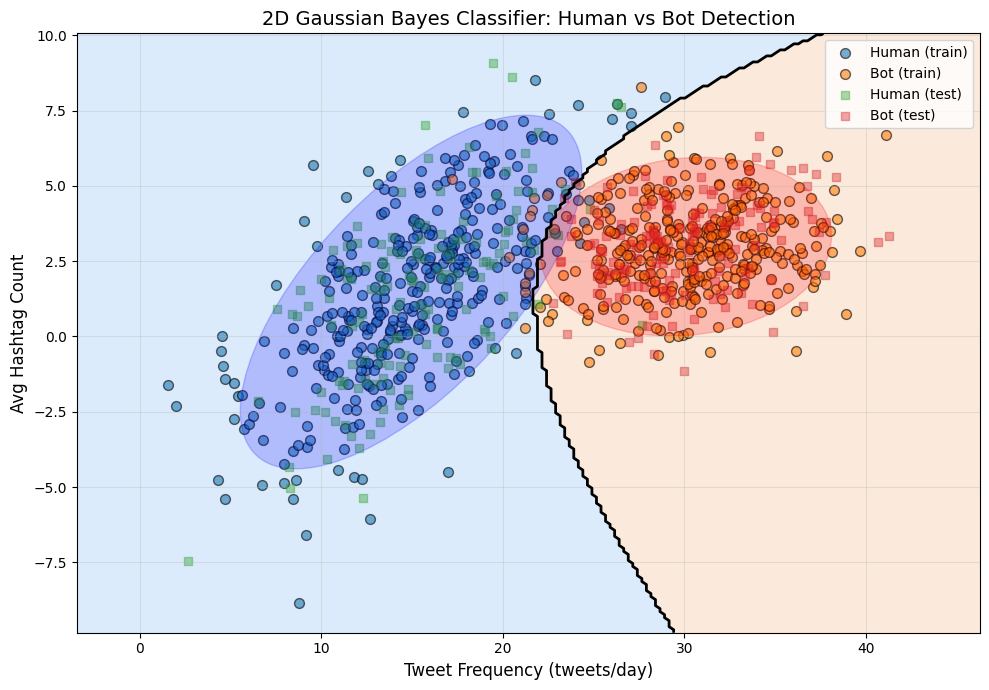

In [60]:

# human = blue, bot = orange
region_cmap = ListedColormap(["#8dbff2", "#f4bc8b"])


# create a mesh grid over the feature space
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# classify each point in the grid
Z = []
for grid_pt in np.c_[xx.ravel(), yy.ravel()]:
    human_lik = multivariate_gaussian_pdf(grid_pt, mu_0_hat, Sigma_0_hat)
    bot_lik = multivariate_gaussian_pdf(grid_pt, mu_1_hat, Sigma_1_hat)

    # Unnormalized posteriors
    human_score = human_lik * prior_0
    bot_score = bot_lik * prior_1

    Z.append(0 if human_score > bot_score else 1)

Z = np.array(Z).reshape(xx.shape)

# plot decision regions
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, levels=1, cmap=region_cmap)

# plot training data
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1],
            label='Human (train)', alpha=0.6, edgecolors='k', s=50)
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1],
            label='Bot (train)', alpha=0.6, edgecolors='k', s=50)

# plot test data with different marker
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1],
            label='Human (test)', alpha=0.4, marker='s', s=30)
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1],
            label='Bot (test)', alpha=0.4, marker='s', s=30)

# add decision boundary (the border between regions)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

# add covariance ellipses
plot_cov_ellipse(mu_0_hat, Sigma_0_hat, color='blue', alpha=0.2, n_std=2)
plot_cov_ellipse(mu_1_hat, Sigma_1_hat, color='red', alpha=0.2, n_std=2)

plt.xlabel("Tweet Frequency (tweets/day)", fontsize=12)
plt.ylabel("Avg Hashtag Count", fontsize=12)
plt.title("2D Gaussian Bayes Classifier: Human vs Bot Detection", fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()